In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Loading the dataset into python environment

In [2]:
data = pd.read_csv(r"C:\Users\sravi\Downloads\ICTAK\preprocessing\titanic_dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Making ‘PassengerId’ as the index column

In [3]:
data.set_index('PassengerId',inplace=True)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Checking the basic details of the dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


#### This data have 11 columns and 891 rows. A major portion of the feature 'Cabin' is null values. And 'Age' a;so have a small amount of null values.

# 4. Filling all the missing values present in all the columns in the dataset

In [5]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

#### 'Age' has 177 missing values, 'Cabin' has 687 missing values and 'Embarked' has 2 missing values

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

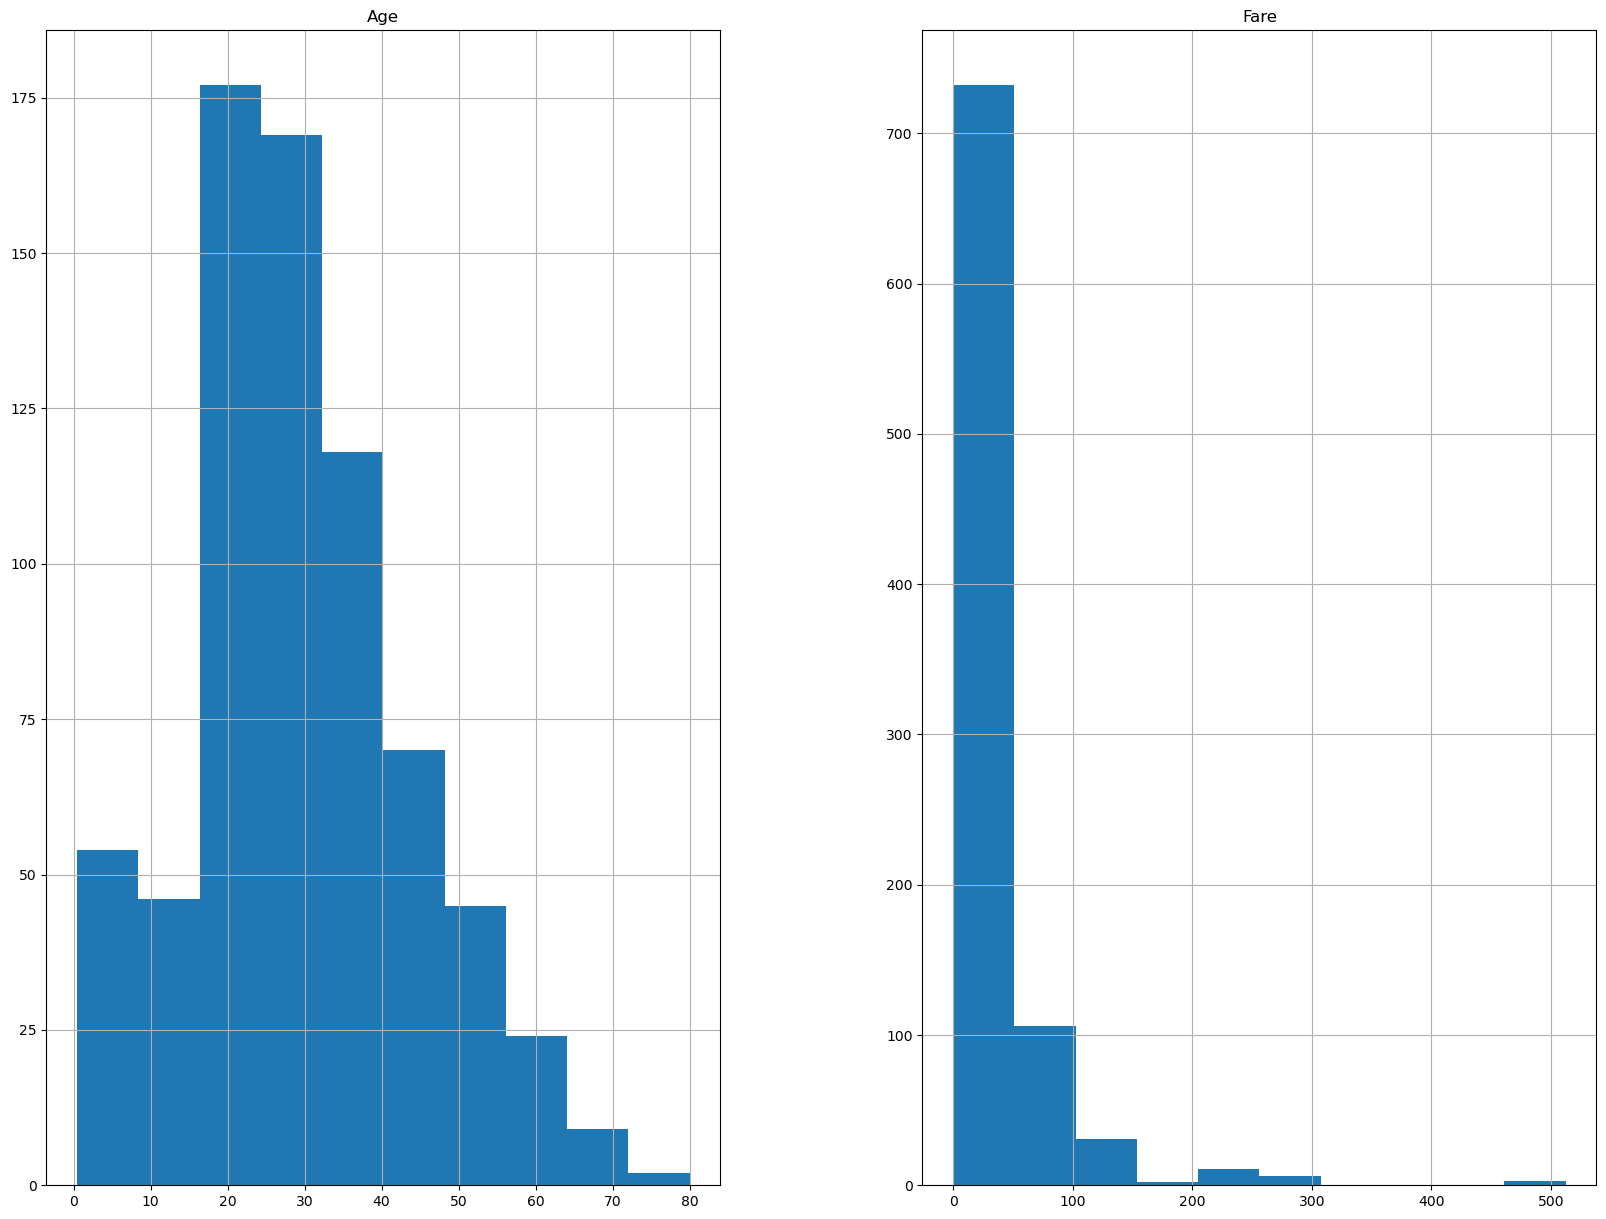

In [6]:
freqgraph = data.select_dtypes(include='float64')
freqgraph.hist(figsize=(20,15))

#### Here 'Cabin' has n no. of null values, so we drop the column ' Cabin'. We fill the column 'Age' using median, because the data is skewed and the column 'Embarked' using mode, because its values are 'object'.

In [7]:
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])
data1=data.dropna(axis=1)
data1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [8]:
data1.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

# 5. Checking and handling outliers in at least 3 columns in the dataset

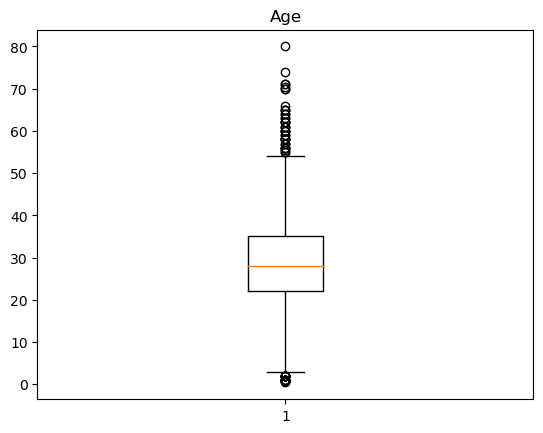

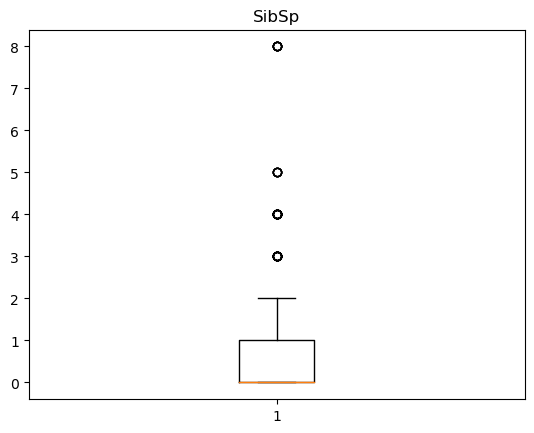

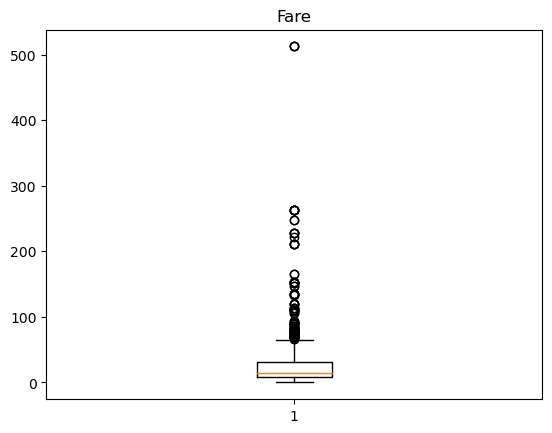

In [9]:
titan_columns=['Age','SibSp','Fare']

for i in titan_columns:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i);

#### All features have outliers.

In [10]:
# Checking the skewness of features.
skew_age=data1['Age'].skew()
skew_sib=data1['SibSp'].skew()
skew_fare=data1['Fare'].skew()

print("Skewness of Age is: ",skew_age)
print("Skewness of SibSp is: ",skew_sib)
print("Skewness of Fare is: ",skew_fare)

Skewness of Age is:  0.5102446555756495
Skewness of SibSp is:  3.6953517271630565
Skewness of Fare is:  4.787316519674893


#### This means all columns are skewed, all values are greater than 0.5. So we use IQR method to handle outliers

In [11]:
# Handling the outliers of 'Age'.

Q1 = np.percentile(data['Age'],25,method='midpoint')
Q2 = np.percentile(data['Age'],50,method='midpoint')
Q3 = np.percentile(data['Age'],75,method='midpoint')

print("Q1 is: ",Q1)
print("Q2 is: ",Q2)
print("Q3 is: ",Q3)

IQR =Q3-Q1
print(IQR)

low_lim = Q1 -1.5*IQR
up_lim = Q3+1.5*IQR

print("lower value: ",low_lim)
print("upper value: ",up_lim)

Q1 is:  22.0
Q2 is:  28.0
Q3 is:  35.0
13.0
lower value:  2.5
upper value:  54.5


In [12]:
outliers=[]

for x in data['Age']:
    if((x<low_lim) or (x>up_lim)):
        outliers.append(x)
        
print(outliers)        

[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


In [13]:
data['Age'] = data['Age'].clip(lower=low_lim,upper=up_lim)

outliers=[]

for x in data['Age']:
    if((x<low_lim) or (x>up_lim)):
        outliers.append(x)
        
print(outliers)        

[]


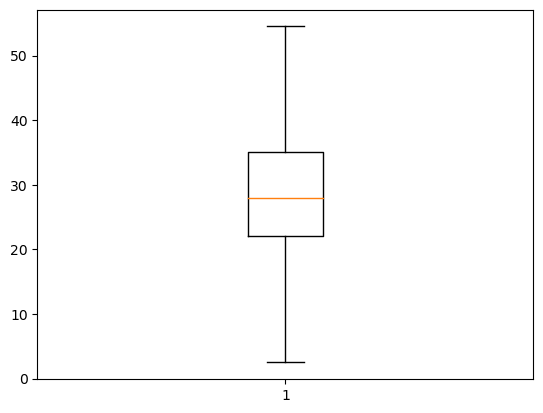

In [14]:
plt.boxplot(data['Age'])
plt.show()

#### There is no outliers in 'Age'.

In [15]:
# Handling the outliers of 'SibSp'.

Q1 = np.percentile(data['SibSp'],25,method='midpoint')
Q2 = np.percentile(data['SibSp'],50,method='midpoint')
Q3 = np.percentile(data['SibSp'],75,method='midpoint')

print("Q1 is: ",Q1)
print("Q2 is: ",Q2)
print("Q3 is: ",Q3)

IQR =Q3-Q1
print("IQR:",IQR)

low_lim = Q1 -1.5*IQR
up_lim = Q3+1.5*IQR

print("lower value: ",low_lim)
print("upper value: ",up_lim)


Q1 is:  0.0
Q2 is:  0.0
Q3 is:  1.0
IQR: 1.0
lower value:  -1.5
upper value:  2.5


In [16]:
outliers=[]

for x in data['SibSp']:
    if((x<low_lim) or (x>up_lim)):
        outliers.append(x)
        
print(outliers)        

[3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8, 3, 3, 5, 3, 5, 3, 4, 4, 3, 3, 5, 4, 3, 4, 8, 4, 3, 4, 8, 4, 8]


In [17]:
data['SibSp'] = data['SibSp'].clip(lower=low_lim,upper=up_lim)

outliers=[]

for x in data['SibSp']:
    if((x<low_lim) or (x>up_lim)):
        outliers.append(x)
        
print(outliers)        

[]


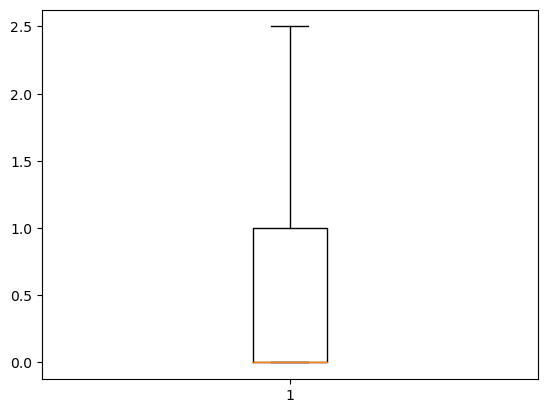

In [18]:
plt.boxplot(data['SibSp'])
plt.show()

#### Outliers are empty in 'SibSp'.

In [19]:
# Handling the outliers of 'Fare'.

Q1 = np.percentile(data['Fare'],25,method='midpoint')
Q2 = np.percentile(data['Fare'],50,method='midpoint')
Q3 = np.percentile(data['Fare'],75,method='midpoint')

print("Q1 is: ",Q1)
print("Q2 is: ",Q2)
print("Q3 is: ",Q3)

IQR =Q3-Q1
print("IQR:",IQR)

low_lim = Q1 -1.5*IQR
up_lim = Q3+1.5*IQR

print("lower value: ",low_lim)
print("upper value: ",up_lim)


Q1 is:  7.9104
Q2 is:  14.4542
Q3 is:  31.0
IQR: 23.0896
lower value:  -26.724
upper value:  65.6344


In [20]:
outliers=[]

for x in data['Fare']:
    if((x<low_lim) or (x>up_lim)):
        outliers.append(x)
        
print(outliers)        

[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.0, 83.1583, 69.55, 89.1042, 164.8667, 69.55, 83.1583]


In [21]:
data['Fare'] = data['Fare'].clip(lower=low_lim,upper=up_lim)

outliers=[]

for x in data['Fare']:
    if((x<low_lim) or (x>up_lim)):
        outliers.append(x)
        
print(outliers)        

[]


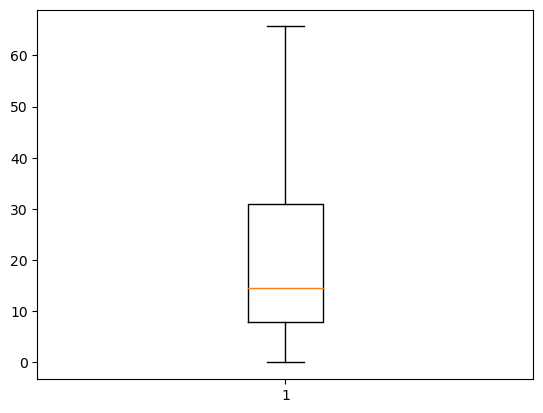

In [22]:
plt.boxplot(data['Fare'])
plt.show()

#### And the outliers are removed from 'Fare' also.

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [23]:
data1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [24]:
y = data1['Survived']
X=data1[['Pclass','Age','SibSp','Parch','Fare']]

In [25]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
# Min-Max scalling

from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
X_mm=minmax.fit_transform(X)
X_mm=pd.DataFrame(X_mm)
X_mm.describe()

,0,1,2,3,4
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.654321,0.363679,0.065376,0.063599,0.062858
std,0.418036,0.163605,0.137843,0.134343,0.096995
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.271174,0.000000,0.000000,0.015440
50%,1.000000,0.346569,0.000000,0.000000,0.028213
75%,1.000000,0.434531,0.125000,0.000000,0.060508
max,1.000000,1.000000,1.000000,1.000000,1.000000


#### Here we can see the min-max value varies in the range 0-1 in all features.

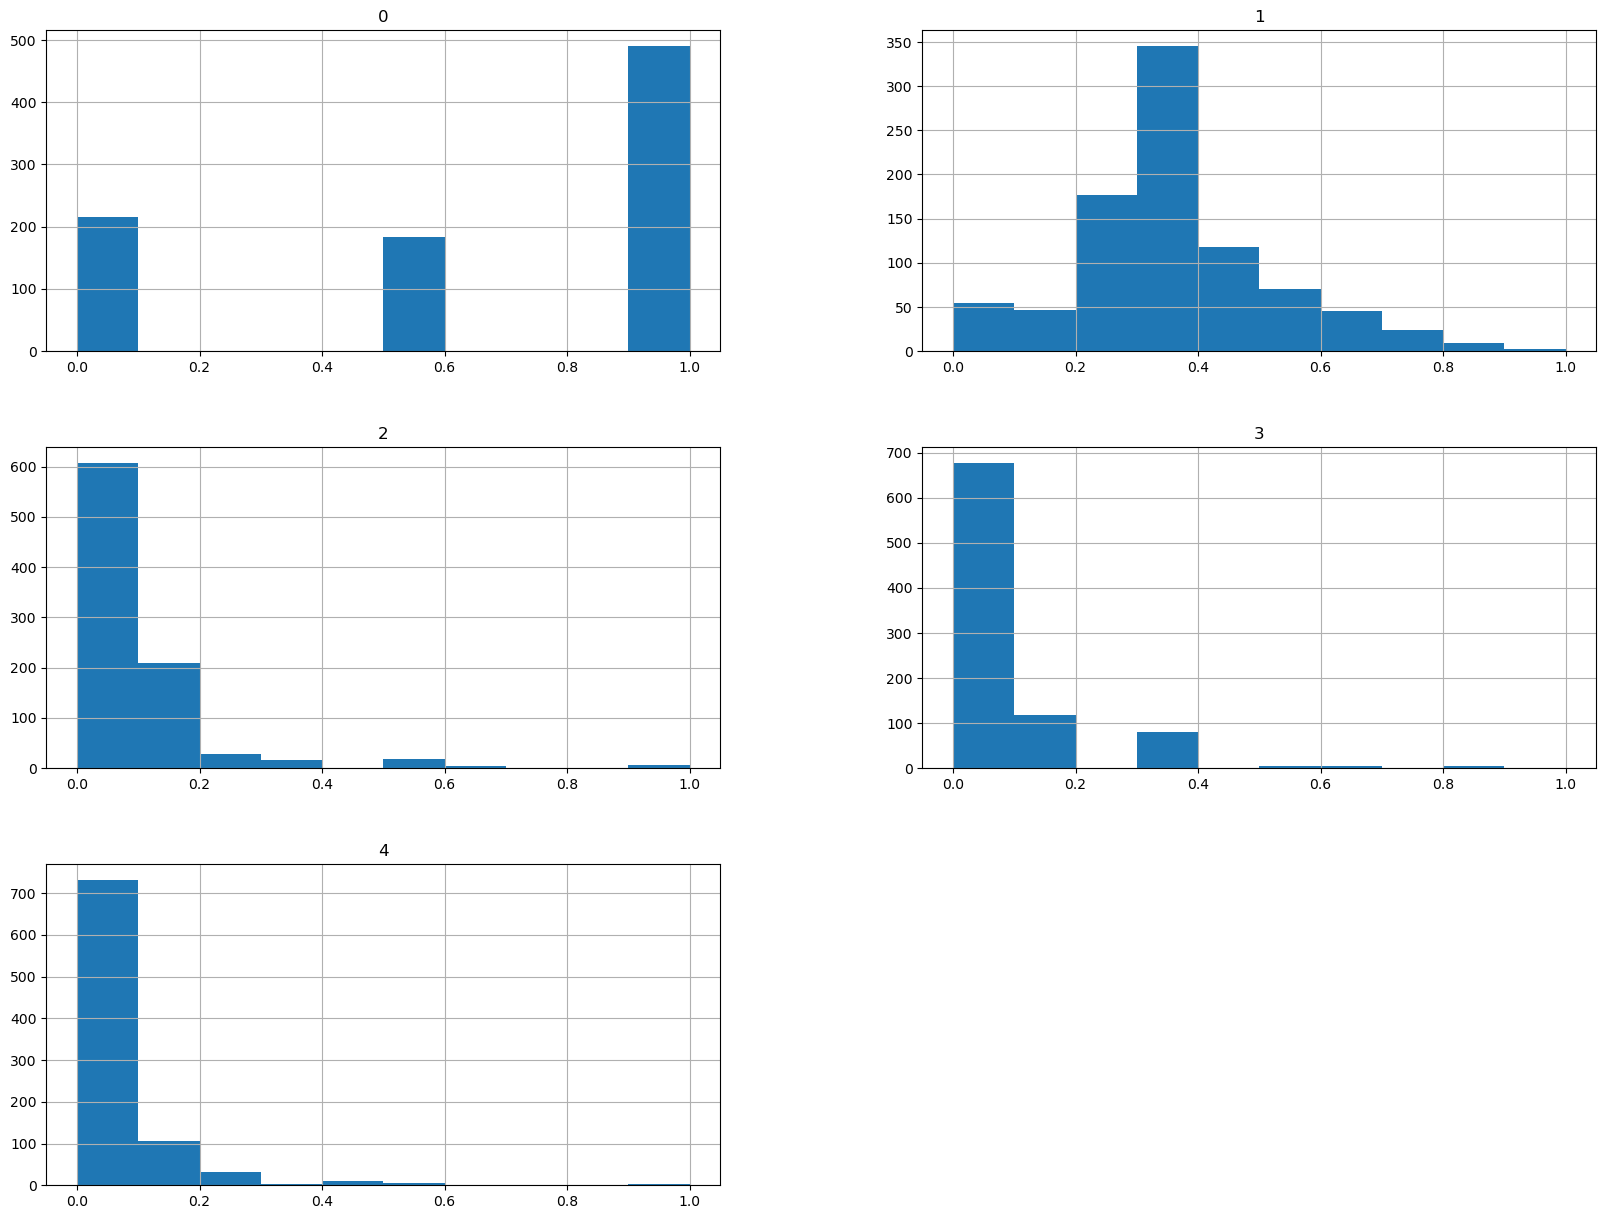

In [27]:
X_mm.hist(figsize=(20,15))
plt.show()